# Objective: To analyse the Airbnb data. 

## You are expected to perform some basic data pre-processing, EDA, correlation analysis, K-means clustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab"

Mounted at /content/drive
/content/drive/My Drive/Colab


## Importing the required libraries


In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.cluster import KMeans 
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Loading The Dataset

In [ ]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb.head(5)
          

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [ ]:
print(airbnb.to_string)

<bound method DataFrame.to_string of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

  

## Summarise the descriptive statistics of the data

In [ ]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
airbnb.corr().T

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


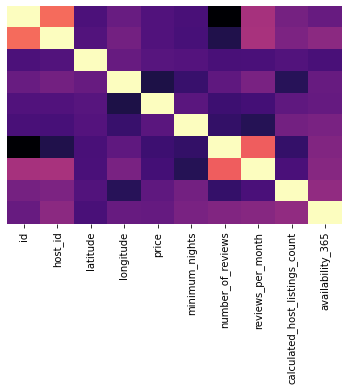

In [ ]:
sns.heatmap(airbnb.corr(),yticklabels=False, cbar=False, cmap='magma')

## Inspect the data type of the various columns present in the DataFrame

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Check for the missing values

In [ ]:
airbnb.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
airbnb.isna().sum()/len(airbnb)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [ ]:
# Dropping columns

airbnb.drop(['id',
             'host_id',
             'name',
             'neighbourhood',
             "latitude",
             "longitude",
             'host_name',
             "reviews_per_month",
             "last_review", 
             "availability_365",
             "calculated_host_listings_count"],axis=1,inplace=True)


column_names = list(airbnb.columns)

column_names

['neighbourhood_group',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews']

In [ ]:
print(airbnb)

      neighbourhood_group        room_type  price  minimum_nights  \
0                Brooklyn     Private room    149               1   
1               Manhattan  Entire home/apt    225               1   
2               Manhattan     Private room    150               3   
3                Brooklyn  Entire home/apt     89               1   
4               Manhattan  Entire home/apt     80              10   
...                   ...              ...    ...             ...   
48890            Brooklyn     Private room     70               2   
48891            Brooklyn     Private room     40               4   
48892           Manhattan  Entire home/apt    115              10   
48893           Manhattan      Shared room     55               1   
48894           Manhattan     Private room     90               7   

       number_of_reviews  
0                      9  
1                     45  
2                      0  
3                    270  
4                      9  
...      

In [ ]:
airbnb.head(10)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews
0,Brooklyn,Private room,149,1,9
1,Manhattan,Entire home/apt,225,1,45
2,Manhattan,Private room,150,3,0
3,Brooklyn,Entire home/apt,89,1,270
4,Manhattan,Entire home/apt,80,10,9
5,Manhattan,Entire home/apt,200,3,74
6,Brooklyn,Private room,60,45,49
7,Manhattan,Private room,79,2,430
8,Manhattan,Private room,79,2,118
9,Manhattan,Entire home/apt,150,1,160


# Exploratory Data Analysis For Airbnb Data

# Neighbourhood


## Show the unique neighbourhood groups

In [ ]:
print(airbnb['neighbourhood_group'])

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object


<Figure size 720x360 with 0 Axes>

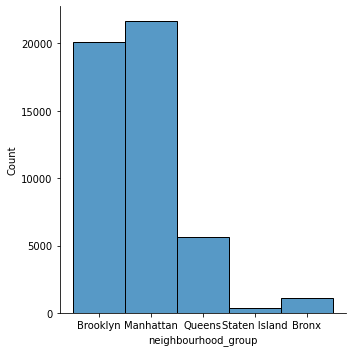

In [ ]:
plt.figure(figsize=(10,5))
sns.displot(x='neighbourhood_group',data=airbnb)

## Show the number of each neighbourhood group


In [ ]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

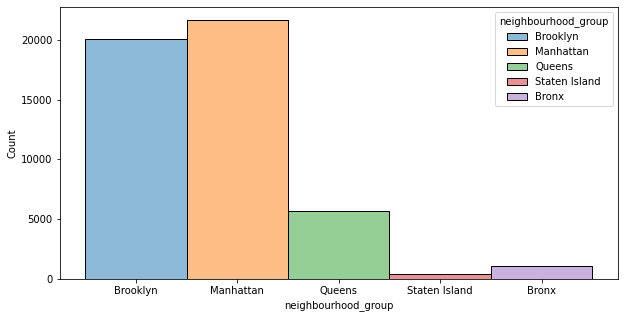

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='neighbourhood_group',hue='neighbourhood_group',data=airbnb)

## Plot the histogram showing neighbourhood_group

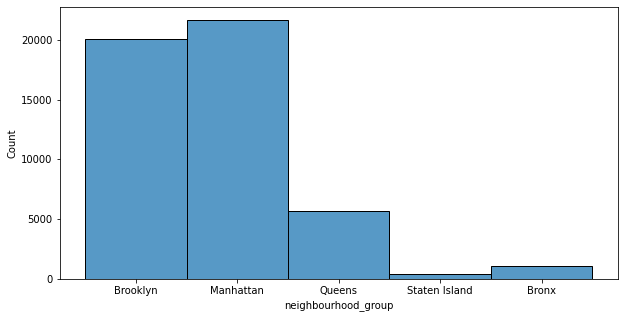

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='neighbourhood_group',data=airbnb)

# Room Type


## Show the unique Room Type

In [ ]:
print(airbnb['room_type'])

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object


## Show the number of each Room Type

In [ ]:
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

## Plot the histogram showing Room Type

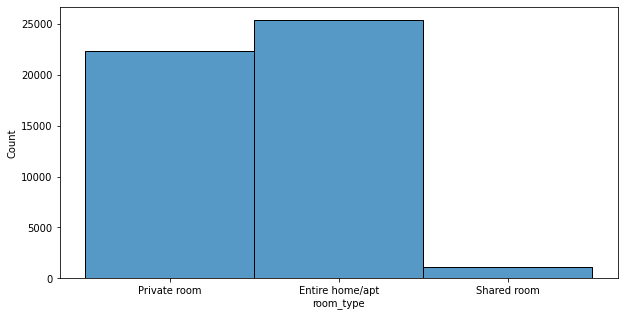

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='room_type',data=airbnb)

## Similarly perform the EDA for other remaining columns

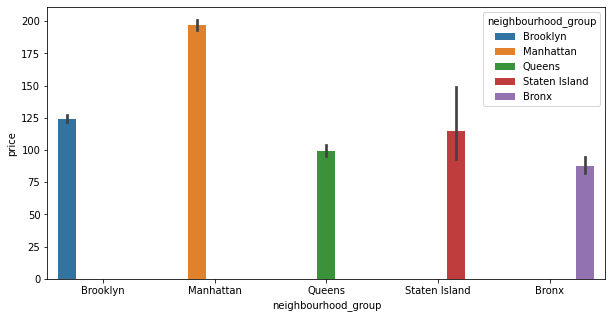

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='neighbourhood_group', y='price',hue='neighbourhood_group',data=airbnb)


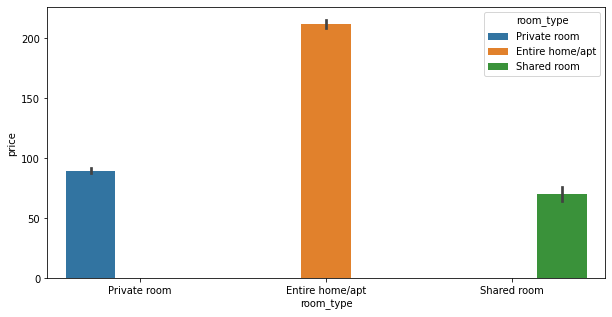

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='room_type', y='price',hue='room_type',data=airbnb)

## Generate scatter plot to check any correlation among minimum nights and number of reviews


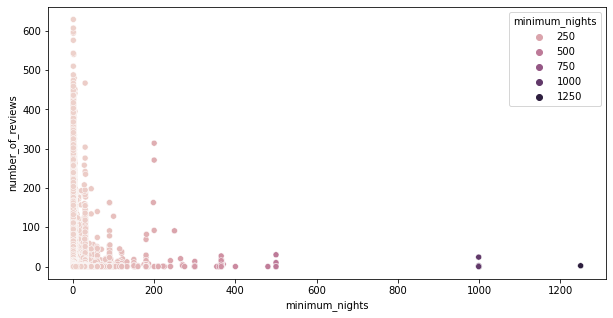

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='minimum_nights', y='number_of_reviews',hue='minimum_nights',data=airbnb)

## Perform K-Means clustering to to group the properties into various clusters.

In [ ]:
X = np.asarray(airbnb[['price', 'minimum_nights', 'number_of_reviews']])
X[0:5]

array([[149,   1,   9],
       [225,   1,  45],
       [150,   3,   0],
       [ 89,   1, 270],
       [ 80,  10,   9]])

In [ ]:
X=stats.zscore(X)
X

array([[-0.01549307, -0.29399621, -0.32041358],
       [ 0.30097355, -0.29399621,  0.48766493],
       [-0.01132904, -0.19648442, -0.52243321],
       ...,
       [-0.15707024,  0.14480686, -0.52243321],
       [-0.4069123 , -0.29399621, -0.52243321],
       [-0.2611711 , -0.00146083, -0.52243321]])

In [ ]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 0 0 0]


In [ ]:
airbnb["Clust"] = labels
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,Clust
0,Brooklyn,Private room,149,1,9,0
1,Manhattan,Entire home/apt,225,1,45,0
2,Manhattan,Private room,150,3,0,0
3,Brooklyn,Entire home/apt,89,1,270,2
4,Manhattan,Entire home/apt,80,10,9,0


In [ ]:
airbnb.groupby('Clust').mean()

,price,minimum_nights,number_of_reviews
Clust,,,
0,147.215943,6.582424,11.510126
1,1834.759259,185.666667,8.995370
2,126.414267,2.917539,137.112347


## Find the optimal value of K

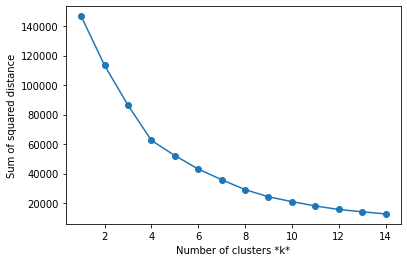

In [ ]:
sse = []
list_k = list(range(1, 15))

for k in list_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot sse against k
plt.figure
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');